In [ ]:
!pip install detecto

In [ ]:
import torch
torch.hub.download_url_to_file('https://github.com/StatisticsHackathon/template-matching/releases/download/1.0/Dataset.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip

In [ ]:
from detecto import core, utils, visualize
# import detecto

path = './drive/MyDrive/nus-sds-dsc2021/images/'
train = core.Dataset('./drive/MyDrive/nus-sds-dsc2021/rcnn/type1')
validation = core.Dataset('./drive/MyDrive/nus-sds-dsc2021/rcnn/validation')

model = core.Model(['chip', 'handwriting'])

# model.fit(train,   epochs = 10)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [ ]:
from detecto import core, utils, visualize

from torchvision import transforms

path = './drive/MyDrive/nus-sds-dsc2021'

augmentations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ColorJitter(saturation=0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

train = core.Dataset('./drive/MyDrive/nus-sds-dsc2021/rcnn/all')
validation = core.Dataset('./drive/MyDrive/nus-sds-dsc2021/rcnn/validation')

loader = core.DataLoader(train, batch_size=2, shuffle=True)
loader2 = core.DataLoader(validation, batch_size=2, shuffle=True)

model = core.Model(['chip', 'handwriting'])

losses = model.fit(loader, loader2, epochs=20, learning_rate=0.0001 )

  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 1 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.8217779723080721
Epoch 2 of 20
Begin iterating over training dataset


 75%|███████▌  | 12/16 [00:06<00:02,  1.70it/s]

KeyboardInterrupt: ignored

In [ ]:
path = './drive/MyDrive/nus-sds-dsc2021/train_data/train_images'
path = './drive/MyDrive/nus-sds-dsc2021/rcnn/type1'

def predict(img):
  image = utils.read_image(img)
  predictions = model.predict(image)

  # predictions format: (labels, boxes, scores)
  labels, boxes, scores = predictions

  # ['alien', 'bat', 'bat']

  if 'handwriting' in labels:
    print('yes')

  len=0
  for score in scores:
    if score >=0.8:
      len=len+1

  
  visualize.show_labeled_image(image, boxes, labels)
  # return len
  # print(labels)

  #           xmin       ymin       xmax       ymax
  # tensor([[ 569.2125,  203.6702, 1003.4383,  658.1044],
  #         [ 276.2478,  144.0074,  579.6044,  508.7444],
  #         [ 277.2929,  162.6719,  627.9399,  511.9841]])
  # print(boxes)

  # tensor([0.9952, 0.9837, 0.5153])
  # print(scores)
  return len

In [ ]:
imgs = [1033,1036,1037,1043,1050,1052,1056,1058]

for img in imgs:
  # print(path+'/'+str(img)+'.jpg')
  num_chips = predict(path+'/'+str(img)+'.jpg')
  print(img, num_chips)

NameError: ignored

In [ ]:
# model.save('model_weights.pth')

# Load saved model

model = core.Model.load('model_weights.pth', ['chip', 'black_dot'])

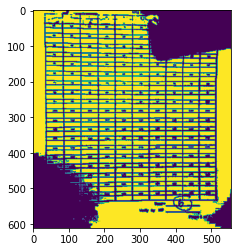

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./drive/MyDrive/nus-sds-dsc2021/rcnn/all/1001.jpg", cv2.CV_8UC1)
# hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# grayA = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grayA, 160, 255, cv2.THRESH_BINARY)

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

# plot image after thresholding
plt.imshow(thresh)
plt.show()
